<a href="https://colab.research.google.com/github/khaledsoudy-1/FineTuning-BERT-Arabic-Sentiment/blob/main/Fine_Tuning_BERT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Fine-Tuning BERT for Sentiment Analysis** 🚀

Created by [Khaled Soudy](https://github.com/khaledsoudy-1) 🥰

---
Hey there! 👋 Today, we’re unleashing the power of **BERT**—specifically, the **[google-bert/bert-base-uncased](https://huggingface.co/google-bert/bert-base-uncased)** model—to tackle sentiment analysis like a pro! 💡  

### What’s the Task?  
We’re working with the **[Arabic 100k Reviews](https://www.kaggle.com/datasets/abedkhooli/arabic-100k-reviews)** dataset—a compilation of 100k (well, 99,999) Arabic reviews from hotels, books, movies, products, and airlines. Each review falls into one of three sentiment categories:  
1️⃣ **Positive** 🌟  
2️⃣ **Negative** 😠  
3️⃣ **Mixed** 🤔  

#### 📂 **About the Dataset**:  
- **Content**: Each review includes a sentiment label (`Positive`, `Negative`, or `Mixed`) and the review text, **separated by tabs** (TSV format).  
- **Processing**: Reviews were cleaned of diacritics and non-Arabic characters, ensuring high-quality data.  
- **Balanced Classes**: No duplicate reviews, making it a robust dataset for classification tasks.  

### Why Fine-Tune BERT?  
BERT has a deep contextual understanding of text, but by fine-tuning it with our dataset, we’ll train it to recognize sentiment in Arabic reviews with precision.  

### What to Expect?  
1️⃣ **Load and explore the dataset** to understand what we’re working with.  
2️⃣ **Prepare BERT for sentiment analysis**.  
3️⃣ **Train and evaluate** our custom sentiment classifier.  

Let’s turn these reviews into actionable insights! 🎉  


---

## **1- Testing Results Before Fine-Tuning** 🛠️

Before fine-tuning the BERT model on our sentiment analysis dataset, we’ll test the pre-trained version as-is. This helps us:

Understand the baseline performance of the model.
Compare results after we fine-tune the model.


### Step 1: Install Required Libraries
To fine-tune BERT, we need the Hugging Face transformers library, which provides pre-trained models, tokenizers, and utilities for NLP tasks. Install it using pip.

In [6]:
!pip install transformers



---


### Step 2: Load BERT Tokenizer and Model


In [7]:
from transformers import BertTokenizer, TFBertForSequenceClassification

model_name = "google-bert/bert-base-uncased"

tokenizer = BertTokenizer.from_pretrained(model_name)
model = TFBertForSequenceClassification.from_pretrained(model_name)

Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/511M [00:00<?, ?B/s]

We’re using the `google-bert/bert-base-uncased` model, designed for English tasks. Here’s what we’re loading:

* `BertTokenizer`: Converts input text into token IDs understandable by the BERT model.
* `TFBertForSequenceClassification`: A BERT model tailored for classification tasks (e.g., sentiment analysis).

Key Parameters:
* `from_pretrained`: Downloads the pre-trained weights of the specified model.



---

### Step 3: Mount Google Drive
We’re working with a dataset stored in Google Drive. Use this code to mount the drive and access the file system.

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).




---

### Step 4: Load the Dataset
Let’s load the **Arabic 100k Reviews dataset**, a TSV file with two columns:

* `label`: Sentiment category (*Positive, Negative, or Mixed*).
* `text`: Review text in Arabic.

In [9]:
file_path = "/content/drive/MyDrive/Colab Notebooks/05-Fine-Tuning-BERT/ar_reviews_100k.tsv"

In [10]:
import pandas as pd

df = pd.read_csv(file_path, sep='\t')
df

,label,text
0,Positive,ممتاز نوعا ما . النظافة والموقع والتجهيز والشا...
1,Positive,أحد أسباب نجاح الإمارات أن كل شخص في هذه الدول...
2,Positive,هادفة .. وقوية. تنقلك من صخب شوارع القاهرة الى...
3,Positive,خلصنا .. مبدئيا اللي مستني ابهار زي الفيل الاز...
4,Positive,ياسات جلوريا جزء لا يتجزأ من دبي . فندق متكامل...
...,...,...
99994,Negative,معرفش ليه كنت عاوزة أكملها وهي مش عاجباني من ا...
99995,Negative,لا يستحق ان يكون في بوكنق لانه سيئ . لا شي. لا...
99996,Negative,كتاب ضعيف جدا ولم استمتع به. فى كل قصه سرد لحا...
99997,Negative,مملة جدا. محمد حسن علوان فنان بالكلمات، والوصف...


**Key Parameters:**
* `sep='\t'`: Specifies that the file uses tabs as column delimiters.



---

### Step 5: Sample Random Rows

Let’s take a random sample of 5 rows for testing purposes.

* `sample(n=5)`: Randomly selects 5 rows.
* `random_state=42`: This ensures that every time you run this code, the same 5 random rows are selected from the dataset (as long as the dataset hasn’t changed).

* If you remove `random_state=42`, you may get different random rows each time you run the code.




In [11]:
random_5_rows = df.sample(n=5, random_state=42)
random_5_rows

,label,text
26002,Positive,أقم على الماشي . بصورة عامة الغرفة جيدة وكل شي...
80420,Negative,لم تعجبني كباقي السلسلة و غير متحمس لقراءة الج...
19864,Positive,كان المكان ممتاز والأمن والاستقبال اوكي . . ال...
81525,Negative,القصة اجمالا مشوقة كونها تعتمد علي شخصيات يجمع...
57878,Mixed,اربع نجوم لولا الملل الذي اصابني في النهاية......


---


### Step 6: Create a Copy of the Sample
To avoid modifying the original dataset, create a copy of the sampled rows. This ensures the original data remains intact.

In [12]:
# Let's copy these random five rows (To Avoid Modifying the Original DataSet)
five_rows_copy = random_5_rows.copy()

# Define custom mappings similar to the Dataset
custom_mapping = {
    0: "Negative",
    1: "Mixed",
    2: "Positive"
}



---


### Step 7: Test the BERT Model on the Dataset
We’re feeding each row to the BERT model to predict sentiments. Here’s what happens step-by-step:

Key Steps:
1. Tokenization: Converts the text into tokens using the `tokenizer`.
2. Prediction: Passes tokenized inputs through the model to get raw outputs (`logits`).
3. Classification: Maps logits to class indices using `argmax` from **pandas Library**.
4. Custom Mapping: Converts class indices into human-readable labels.

In [13]:
# Let's test the BERT model on the Dataset
import numpy as np

# Create an empty list
predicted_sentiments_list = []

for row in five_rows_copy['label']:
  inputs = tokenizer(row)

  input_ids = inputs['input_ids']

  predictions = model.predict([input_ids])

  logits = predictions.logits

  predicted_class = np.argmax(logits)

  predicted_sentiment = custom_mapping[predicted_class]

  # Append to sentiments list
  predicted_sentiments_list.append(predicted_sentiment)

print(predicted_sentiments_list)

1/1 [==============================] - 0s 49ms/step
['Mixed', 'Mixed', 'Mixed', 'Mixed', 'Mixed']


Functions and Parameters:
* `tokenizer()`: Tokenizes input text.
* `logits`: Raw scores from the model for each sentiment class.
* `np.argmax(logits)`: Finds the class with the highest score.



---


### Step 8: Compare Predicted Sentiments with Original Labels
Finally, let’s add a new column to the copied DataFrame (**five_rows_copy**) to compare the original labels with the BERT model’s predictions.

* `Bert_Sentiments`: Column containing predicted sentiments.

In [14]:
# Comparing Predicted Sentiments with Original Labels

five_rows_copy['Bert_Sentiments'] = predicted_sentiments_list
five_rows_copy

,label,text,Bert_Sentiments
26002,Positive,أقم على الماشي . بصورة عامة الغرفة جيدة وكل شي...,Mixed
80420,Negative,لم تعجبني كباقي السلسلة و غير متحمس لقراءة الج...,Mixed
19864,Positive,كان المكان ممتاز والأمن والاستقبال اوكي . . ال...,Mixed
81525,Negative,القصة اجمالا مشوقة كونها تعتمد علي شخصيات يجمع...,Mixed
57878,Mixed,اربع نجوم لولا الملل الذي اصابني في النهاية......,Mixed




---


## **Limitations: BERT Model and Arabic Data ?!**🤔
The pre-trained BERT model we’re using (`google-bert/bert-base-uncased`) was trained **primarily on English text**, which means it might not perform optimally on Arabic data. 🧐 While BERT’s architecture is powerful and can generalize well, it wasn’t specifically fine-tuned for Arabic language tasks like sentiment analysis. As a result, the model's predictions on Arabic reviews **might not be as reliable or accurate.**


**Why Fine-Tune the Model?**

By fine-tuning the model using the Arabic 100k Reviews dataset, we can teach the model to better understand the nuances of sentiment in Arabic text. Fine-tuning allows the model to specialize in recognizing the sentiment of Arabic reviews, improving its performance and reliability for this specific task. 🚀



---


## **2- Testing Results After Fine-Tuning 🛠️**
Now that we’ve fine-tuned our BERT model on the Arabic 100k Reviews dataset, it’s time to test it on new data! This will help us:

* Evaluate how well the fine-tuned model performs on Arabic sentiment analysis.
* Compare its performance against the baseline (pre-trained model) and see the improvement.

We’ll run the fine-tuned model on a set of reviews and analyze the results to see how much better it handles the Arabic sentiment classification task! 💡

### Step 1: Preparing Dataset for Training




#### **A- Sampling Dataset (if necessary)**

In [15]:
df.shape

(99999, 2)


* Since our dataset consists of **99,999 rows**, training on the entire dataset could **take a long time** ⏳.

* Additionally, there's always a risk of facing errors during lengthy training, which can be frustrating.
* To avoid this, **we’ll sample 30,000 rows** to speed up the process and lessen potential issues.

In [16]:
df = df.sample(n=30000, random_state=42)

print(f"Total Number of Rows and Columns After Sampling: {df.shape}")

Total Number of Rows and Columns After Sampling: (30000, 2)


* `random_state=42`: It ensures that the sampling process is reproducible, meaning **we'll get the same 30,000 rows every time we run the code**. This is important to ensure consistent results during training and evaluation.



---


#### **B- Visualizing Our Dataset** (Optional)

Before we dive into fine-tuning our model, it's essential to understand the distribution of review lengths (**the text column**) in our dataset. Since transformer models like BERT have a limit on the number of tokens (**512 Tokens**) they can process, we need to make sure that our data fits within this limit.

--

**Why Visualize Review Lengths?**
- **Understand the dataset better**: Visualizing the text lengths helps us see whether most reviews (texts) are short or long and decide how to handle them.

- **Decide the right `maxlen` for the model**: Since BERT has a token limit (512 tokens), if your input exceeds 512 tokens:
It will either throw an error (if truncation isn’t set) or truncate to the first 512 tokens. By Visualising the dataset, we can chose a resonable `maxlen` for most cases.

<Axes: ylabel='Frequency'>

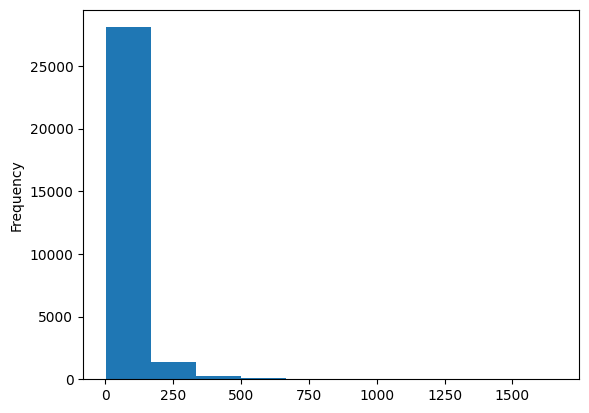

In [17]:
df.text.apply(lambda x: len(x.split())).plot(kind='hist')

---
**What Does This Output Mean?! 🤔**

Looking at the histogram, you can observe that:

1.    **Most reviews are short:** A majority of reviews in the dataset fall within a small word count range (likely less than 100 words).


2.  **Few reviews are very long (outliers):** There’s a tail at the higher end of the histogram, indicating that a small number of reviews have a large number of words.


---
**Next Steps ?! 🤨**

Depending on your analysis, you may want to:

1. **Remove reviews with too few words** that do not contribute much context.

2. **Truncate or split long reviews** to ensure they fit within the model's tokenization limits (e.g., BERT has a token limit of 512 tokens per input).

3. **setting the `maxlen` parameter**: It specifies the maximum number of words (or tokens) that BERT will process for each review. This is crucial because BERT has a fixed limit on the number of tokens it can handle.


---
**How to Decide the Right `maxlen` ?!** 🔍

* **Use shorter `maxlen`:** If your text is generally short (e.g., tweets or short reviews), using a smaller maxlen (like 100 or 150) could work.

* **Use longer `maxlen`:** If your text is generally long (e.g., long articles or detailed reviews), you might need to go up to 512 **(the max token limit of BERT)**.

* **Test and Experiment:** If you're unsure, you can experiment with different values of `maxlen`. Start with something reasonable like **200** and test the performance of the model. You can adjust it based on results.

* **Memory & Speed:** Shorter `maxlen` (e.g., **200**) leads to faster processing and lower memory usage. Longer `maxlen` (e.g., **512**) requires more computational resources.

* **Dataset Analysis:** Visualize the token distribution (as we did earlier) to pick a reasonable `maxlen` that covers **most of your data** without truncating too much.



---
**What If We Choose a Different `maxlen` ?!**🤔

* **Too Short (e.g., `maxlen=50`):** If we use a very short limit, like 50, we risk losing important context from longer reviews. This could negatively impact the model's accuracy, especially for reviews that need more words to express sentiment.

* **Too Long (e.g., `maxlen=512`):** If we set maxlen too high (such as 512), the model might spend more time processing longer sequences that aren't needed for most of the reviews. This can slow down training and inference without improving performance.


---
**🔴 Final Decesion on `maxlen` ?!**


- Setting `maxlen=200` is a reasonable choice.



**Why 200 Tokens?**


If we set `maxlen=200`, we’re limiting the input to **200 tokens**, even though BERT can handle up to **512 tokens**. This is useful when you:

1. **Want to reduce memory usage or training time.**

2. **Know that longer inputs aren't critical for your task.**





---


#### **C- Converting the dataset into a format that BERT (or other ML models) can understand.**

* **Text Data**: BERT and ML models don’t directly understand raw text. We need to tokenize it into numerical representations (tokens) that the model can process.

* **Labels**: Similarly, models require numerical values for the target labels (e.g., sentiment categories like "Mixed," "Positive," and "Negative") instead of text.

------------------------
**How Can We Do that ❓❗**
1. **Numerically Encode the Labels:** Use a library like **scikit-learn's `LabelEncoder`** to map text-based labels (e.g., "Mixed") to numerical values (e.g., 0, 1, ...).


2. **Split the Data:** Divide the dataset into training and validation sets to evaluate the model during training.

3. **Tokenize the Text:** Use BERT’s tokenizer to break down sentences tokens and convert them into numerical IDs.





In [18]:
import numpy as np

for label in np.unique(df['label']):
  print(label)

Mixed
Negative
Positive


* `np.unique(df['label'])`: extracts all unique values in the `label` column of the Dataframe.


In [19]:
from sklearn.preprocessing import LabelEncoder

LE = LabelEncoder()

df['label'] = LE.fit_transform(df['label'])
df.head()

,label,text
26002,2,أقم على الماشي . بصورة عامة الغرفة جيدة وكل شي...
80420,1,لم تعجبني كباقي السلسلة و غير متحمس لقراءة الج...
19864,2,كان المكان ممتاز والأمن والاستقبال اوكي . . ال...
81525,1,القصة اجمالا مشوقة كونها تعتمد علي شخصيات يجمع...
57878,0,اربع نجوم لولا الملل الذي اصابني في النهاية......


* `LabelEncoder()`: This scikit-learn class converts categorical labels into numeric ones.

* `LE.fit_transform(df['label'])`: It maps the text labels to numeric values. For example:
  * "Mixed" → 0
  * "Negative" → 1
  * "Positive" → 2

* The transformed labels are then stored back in the **`df['label']` column**.

In [20]:
# Check after converting labels into numerics
for label in np.unique(df['label']):
  print(label)

0
1
2


### **Step 2: Splitting the Data for Training and Validation:**
To train and evaluate our model, we need to split the dataset into:

* **Training Set**: Used to teach the model.
* **Validation Set**: Used to evaluate the model's performance.



In [21]:
from sklearn.model_selection import train_test_split

train, val = train_test_split(df, test_size=0.2, random_state=42)

* `train_test_split()`: Splits the data set into training set and validation set.

* `test_size=0.2`: Specifies that 20% of the dataset will be used as the validation set.



In [22]:
# Check the new shapes
print(train.shape)
print(val.shape)

(24000, 2)
(6000, 2)


In [23]:
# Let's check our sets
train.head()

,label,text
26667,2,استمتعت . الموقع الخصوصيه. عدم توفر الانترنت
66268,0,مكان الفندق رائع قريب من المسجد النبوي . قرب م...
88175,1,لن اكرر الاقامة . . رائحة الشراشف سيئة لايوضع ...
34168,0,بسيط وممتع الى حد ما
35914,0,مرضي. القرب من الحرم. الاثاث لا يرتقي لفندق خم...


#### **Resetting the Indexes 🔄 :**
When you split the data, the original row indices from the dataframe are retained. Resetting the index ensures that the new subsets start with sequential indices.



In [24]:
# Let's reset the index values
train.reset_index(drop=True, inplace=True)
val.reset_index(drop=True, inplace=True)

train.head()

,label,text
0,2,استمتعت . الموقع الخصوصيه. عدم توفر الانترنت
1,0,مكان الفندق رائع قريب من المسجد النبوي . قرب م...
2,1,لن اكرر الاقامة . . رائحة الشراشف سيئة لايوضع ...
3,0,بسيط وممتع الى حد ما
4,0,مرضي. القرب من الحرم. الاثاث لا يرتقي لفندق خم...


* `drop=True`: Drops the old index column instead of adding it back as a new column.

* `inplace=True`: Updates the dataframe directly instead of creating a copy.


In [25]:
train.head()

,label,text
0,2,استمتعت . الموقع الخصوصيه. عدم توفر الانترنت
1,0,مكان الفندق رائع قريب من المسجد النبوي . قرب م...
2,1,لن اكرر الاقامة . . رائحة الشراشف سيئة لايوضع ...
3,0,بسيط وممتع الى حد ما
4,0,مرضي. القرب من الحرم. الاثاث لا يرتقي لفندق خم...


In [26]:
val.head()

,label,text
0,0,يحتاج للتطوير . تسجيل الخروج المتأخر. دخول تنظ...
1,1,المجهود المبالغ فيه فى اختيار و رسم التعابير و...
2,1,اخيس كتاب القصه مقتبسه
3,2,استثنائي. النظافه الطاغية في المكان والرقي في ...
4,1,لا انصح بالسكن فيه حتى يجدد . الموقع جيد ولكن ...


___
### Step 3: Converting Text and Labels into Arrays

When feeding the data into the ML model we need to convert them into **arrays**.
This conversion is necessary because ML typically work with arrays rather than DataFrame Objects.

In [27]:
# Convert text and label columns of the traing data into Numpy arrays
x_train = train['text'].to_numpy()
y_train = train['label'].to_numpy()

# Apply for the validation data also
x_test = val['text'].to_numpy()
y_test = val['label'].to_numpy()

* `.to_numpy()`: Converts the text and label data (stored in pandas DataFrames) into NumPy arrays. This conversion is necessary for feeding the data into ML models, which **typically work with arrays rather than DataFrame objects**.


In [28]:
print(f"Text column of the Train Data:\n {x_train}")
print(f"\nLabel column of the Train Data:\n {y_train}")
print(type(x_train))
print(type(y_train))

Text column of the Train Data:
 ['استمتعت . الموقع الخصوصيه. عدم توفر الانترنت'
 'مكان الفندق رائع قريب من المسجد النبوي . قرب من المسجد النبويبوفيه الغداء كان ممتاز. واجهتنا مشكلة في الدخول حيث أن السعر الموجود لديهم كان يختلف عن السعر الحقيقي مما تطلب الأمر لطباعة الفاوتشر.'
 'لن اكرر الاقامة . . رائحة الشراشف سيئة لايوضع في الغرفة مناديل بشكل كافي الاثاث مستهلك'
 ...
 'باختصار شديد :. قصة عادية جدا ، تكررت روايتها على ألسنة أربعة شخصيات ، كل يحكي من زاويته. فيما عدا ذلك ، القصة شديدة السخف ولا متعة فيها. ويبدو أنها كتبت للنقاد وليس لجمهور الأدب'
 'رائع. وجود الفندق قرب المطاعم والبحر وأشكر الأخ أحمد في الإستقبال على حسن تعامله وبشاشة وجهه. تسجيل الدخول لم يكون بالسرعة المطلوبه'
 'جميل .. ما فهمتش الهيبتا ولا النهاية ولا المغزى من القصص بس جميل .']

Label column of the Train Data:
 [2 0 1 ... 1 2 0]
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [29]:
print(f"Text column of the Validation (Test) Data:\n {x_test}")
print(f"\nLabel column of the Validation (Test) Data:\n {y_test}")

Text column of the Validation (Test) Data:
 ['يحتاج للتطوير . تسجيل الخروج المتأخر. دخول تنظيف الغرف على الغرفة بدون استئذان'
 'المجهود المبالغ فيه فى اختيار و رسم التعابير و تجميل اللغة اضر بشكل كبير بانسيابية السرد واوجد كم لا باس به من الملل'
 'اخيس كتاب القصه مقتبسه' ...
 'لغة جميلة جدا ...موضوع بات يصيبني منه الغثيان عن الحب الذي ملأ الروايات أتحدث لو كتبت مراجعتي للرواية قبل سنوات لكان أحسن لأنني قرأتها قرابة سنوات من ذي قبل لذا لم يبق لي منها في ذاكرتي إلا الدهشة الاولى ،أنا التي كنت يومذاك أخطو خطواتي القراءاتية الاولى في فن الرواية. لذا هذا الذي كتبته ليس مراجعة بقدر ما هو مرور على كتب كنت قرأتها أحاول استذكارها'
 'جيد جدا. اتساع الشقه طاقم العمل ودودين. رائحة الدخان بالغرفه كانت جدا جدا مزعجه'
 'رائع. اعجبني طاقم العمل وسرعة خدمتهم..']

Label column of the Validation (Test) Data:
 [0 1 1 ... 0 2 2]


___
### Step 4: Training the model

Now, we're ready to feed the data into the model.

#### **A - Intall Required Libraries**
We're goint to use the **`ktrain` library** for training our model.

* `ktrain`: This is a high-level wrapper for building and deploying machine learning models. It simplifies working with models like **BERT** for tasks such as classification, text processing, and fine-tuning. **`ktrain` is built on top of TensorFlow** (and other libraries), so you need it for easier interaction with BERT and other models.


* `tensorflow`: This is a deep learning framework that provides the foundation for training and running models. **`ktrain` relies on TensorFlow** to actually execute model training, prediction, and evaluation. Without TensorFlow installed, ktrain won't be able to perform its tasks because it's built on top of it.

In [1]:
!pip install ktrain==0.32.3

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.3/25.3 MB 82.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 57.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 653.6/653.6 kB 40.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.9/67.9 kB 5.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 102.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.8/468.8 kB 34.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 897.5/897.5 kB 56.3

In [2]:
!pip install tensorflow==2.15.0

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.2/475.2 MB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 38.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 18.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 41.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 442.0/442.0 kB 17.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 6.0 MB/s eta 0:00:00
  Attempting uninstall: wrapt
    Found existing installation: wrapt 1.17.0
    Uninstalling wrapt-1.17.0:
      Successfully uninstalled wrapt-1.17.0
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.4.1
    Uninstalling ml-dtypes-0.4.1:
      Successfully uninstalled ml-dtypes-0.4.1
  Attempting uninstall: keras
    Found existing installation: keras 3.5.0
    Uninstalling keras-3.5.0:
      Successfully uninstalled keras-3.5.0
  Attempting uninstall: tensorboard
    Found existing installation

#### **B - Creating a Transformer Object**

The `ktrain.text.Transformer` class allows us to define and preprocess the data for a specific model.


In [4]:
from ktrain import text

# Specify the model name, categories and maxlen for the text transformer object.
model_name = 'bert-base-uncased'
class_names = ['Mixed', 'Negative', 'Positive']

text_transformer = text.Transformer(model_name=model_name, class_names=class_names, maxlen=200)

Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

* `text.Transformer`: **Transformer** (`model_name`, `maxlen: int = 128`, `class_names: Any = []`, `classes: Any = []`, `batch_size: Any` | None = None, use_with_learner: bool = True)

* `model_name='bert-base-uncased'`: Refers to the pre-trained BERT model that will be fine-tuned.

* `class_names=['Mixed', 'Negative', 'Positive']`: Defines the sentiment classes for our task.

* `maxlen=200`: Sets the maximum sequence length for the text data. Reviews longer than this will be truncated, and shorter reviews will be padded.


#### **C - Building and Preporecessing the Data**
We need to preprocess the data before feeding it into the BERT model.




In [ ]:
import ktrain

model = text_transformer.get_classifier()
train_data = text_transformer.preprocess_train(x_train, y_train)
val_data = text_transformer.preprocess_test(x_test, y_test)

learner = ktrain.get_learner(model=model, train_data=train_data, val_data=val_data, batch_size=16)

* `ktrain.get_learner()`: Returns a Learner instance that can be used to tune and train Keras models.

* **`get_learner`**: (`model: Any`, `train_data: Any` | None = None, `val_data: Any` | None = None, `batch_size: int` = U.DEFAULT_BS, eval_batch_size: int = U.DEFAULT_BS, workers: int = 1, use_multiprocessing: bool = False) -> Any



* `get_classifier()`: Returns the BERT model ready for fine-tuning.

* `text_transformer.preprocess_train(x_train, y_train)`: This method processes the training data (x_train and y_train), tokenizes the text (converts it into tokens that the model can understand), and encodes the labels.

* `text_transformer.preprocess_test(x_test, y_test)`: Similarly, this method processes the validation data (x_test and y_test), preparing it in the same format as the training data for evaluation.

#### **D - Training The Model**

Let’s fine-tune BERT using **one-cycle learning** to optimize the learning rate and achieve faster convergence.


In [ ]:
import time

start = time.time()
learner.fit_onecycle(lr=2e-5, epochs=3)
end = time.time()

print(f"Total Training Time: {round(end - start)} seconds")



begin training using onecycle policy with max lr of 2e-05...
Epoch 1/3
1500/1500 [==============================] - 1206s 789ms/step - loss: 0.9444 - accuracy: 0.5000 - val_loss: 0.8000 - val_accuracy: 0.5950
Epoch 2/3
1500/1500 [==============================] - 1185s 790ms/step - loss: 0.7990 - accuracy: 0.6040 - val_loss: 0.7501 - val_accuracy: 0.6385
Epoch 3/3
1500/1500 [==============================] - 1179s 786ms/step - loss: 0.7255 - accuracy: 0.6551 - val_loss: 0.7370 - val_accuracy: 0.6445
Total Training Time: 3577 seconds


* `fit_onecycle(lr=2e-5, epochs=3)`: Trains the model for 3 epochs using a learning rate of 2e-5 (0.00002).

* `2e-5`: The learning rate used for training. This value is small, as fine-tuning pre-trained models generally requires smaller learning rates to avoid damaging the model's pre-trained knowledge.

* `epochs=3`: The number of epochs, i.e., how many times the entire training dataset will be processed by the model.




---
### Step 5: Validating the Model

In [ ]:
learner.validate(class_names=class_names)

188/188 [==============================] - 94s 470ms/step
              precision    recall  f1-score   support

       Mixed       0.58      0.53      0.55      1991
    Negative       0.65      0.73      0.69      2067
    Positive       0.70      0.67      0.68      1942

    accuracy                           0.64      6000
   macro avg       0.64      0.64      0.64      6000
weighted avg       0.64      0.64      0.64      6000



array([[1057,  545,  389],
       [ 390, 1514,  163],
       [ 384,  262, 1296]])

* `learner.validate(class_names=class_names)`: evaluates the model’s performance on the validation dataset and prints out metrics such as accuracy, precision, recall, and F1-score for each of the sentiment categories *(Mixed, Negative, Positive)*.



---
### Step 6: Saving the Fine-Tuned Model


In [ ]:
predictor = ktrain.get_predictor(model=learner.model, preproc=text_transformer)

# Saving the fine-tuned model
predictor.save("/content/drive/MyDrive/Colab Notebooks/05-Fine-Tuning-BERT/Finetuned_Arabic_Sentiment_BERT")

* `ktrain.get_predictor(model=learner.model, preproc=text_transformer)`: Creates a predictor object using the trained model (`learner.model`) and the pre-processing pipeline (`preproc=text_transformer`). This allows you to easily use the model for predictions.

* `.save()`: Saves the predictor object, including the model and pre-processing steps, to the specified directory. This makes it easy to reload the model later.




---
### Step 7: Loading the Saved Model.


In [30]:
from ktrain import load_predictor

# Load the saved predictor
predictor = load_predictor('/content/drive/MyDrive/Colab Notebooks/05-Fine-Tuning-BERT/Finetuned_Arabic_Sentiment_BERT')

### Step 8: Testing the Model with examples

In [31]:
example = ["كله رائع بجد ربنا يكرمك", "اتقوا الله فينا بكفي رفع اسعار الرواتب بالحضيض"]

predictions = predictor.predict(example)
predictions

1/1 [==============================] - 7s 7s/step


['Positive', 'Mixed']

**Key Takeaway:**
* These examples show that the model effectively handles the complexities of sentiment analysis in Arabic, distinguishing positive remarks from more nuanced or mixed emotions. This demonstrates the power of fine-tuning BERT for specific tasks and datasets. 🎉

---
### Step 9: Testing the Model on out Dataset

Now, let's test the fine-tuned model on our dataset to evaluate its preformance.

In [32]:
random_5_rows

,label,text
26002,Positive,أقم على الماشي . بصورة عامة الغرفة جيدة وكل شي...
80420,Negative,لم تعجبني كباقي السلسلة و غير متحمس لقراءة الج...
19864,Positive,كان المكان ممتاز والأمن والاستقبال اوكي . . ال...
81525,Negative,القصة اجمالا مشوقة كونها تعتمد علي شخصيات يجمع...
57878,Mixed,اربع نجوم لولا الملل الذي اصابني في النهاية......


Let's copy these random five rows (To Avoid Modifying the Original DataSet)

In [33]:
random_5_rows_copy = random_5_rows.copy()

In [36]:
# Create an empty list for the predicted sentiments
predicted_sentiments = []

for text in random_5_rows_copy['text']:
  predictions = predictor.predict(text)

  predicted_sentiments.append(predictions)

print(predicted_sentiments)

1/1 [==============================] - 0s 159ms/step
['Mixed', 'Negative', 'Mixed', 'Mixed', 'Mixed']


### Step 9: Compare the Predicted Sentiments with the Original


In [37]:
random_5_rows_copy['Predicted_Sentiments'] = predicted_sentiments
random_5_rows_copy

,label,text,Predicted_Sentiments
26002,Positive,أقم على الماشي . بصورة عامة الغرفة جيدة وكل شي...,Mixed
80420,Negative,لم تعجبني كباقي السلسلة و غير متحمس لقراءة الج...,Negative
19864,Positive,كان المكان ممتاز والأمن والاستقبال اوكي . . ال...,Mixed
81525,Negative,القصة اجمالا مشوقة كونها تعتمد علي شخصيات يجمع...,Mixed
57878,Mixed,اربع نجوم لولا الملل الذي اصابني في النهاية......,Mixed


### **Final Observations** 🌟  

Upon review, the model's predictions often seem **more accurate** than the dataset labels.  

For example:  
- **Example 26002**: Labeled **Positive**, but the model correctly identified it as **Mixed** due to both positive and negative remarks.  

- **Example 19864**: Labeled **Positive**, yet the model’s prediction of **Mixed** better reflects the review's tone, which included significant complaints.

---

### **Conclusion**:  
The model captures nuances better than the dataset labels, showing its strength in understanding complex sentiments. This highlights the power of fine-tuned BERT for sentiment analysis! 🚀


---

### **About the Author** 👨‍💻  

This fine-tuning project was created by **Khaled Soudy**. Check out more of my work on [GitHub](https://github.com/khaledsoudy-1)! 😊  

---